In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price-prediction/laptop_price.ipynb
/kaggle/input/laptop-price-prediction/laptop_data.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 

In [3]:
data= pd.read_csv('/kaggle/input/laptop-price-prediction/laptop_data.csv')
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
data.shape

(1303, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
data.rename(columns={'Unnamed: 0':'Index'}, inplace= True)
data.set_index('Index', drop= True, verify_integrity=True, inplace= True)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
Index,,,,,,,,,,,
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
data['Ram']= data['Ram'].str.replace('GB', '')
data['Ram']= data['Ram'].astype(int)

In [8]:
data['Memory']= data['Memory'].replace('\.0', '', regex= True)
mem= data['Memory'].str.split('+', n=1, expand= True)

In [9]:
data['mem_1']= mem[0]
data['SSD']= data['mem_1'].apply(lambda x: 1 if 'SSD' in x else 0)
data['HDD']= data['mem_1'].apply(lambda x: 1 if 'HDD' in x else 0)
data['Flash Storage']= data['mem_1'].apply(lambda x: 1 if 'Flash Storage' in x else 0)
data['Hybrid']= data['mem_1'].apply(lambda x: 1 if 'Hybrid' in x else 0)

data['mem_2']= mem[1].str.strip().fillna('0')
data['SSD']= data['mem_2'].apply(lambda x: 1 if 'SSD' in x else 0)
data['HDD']= data['mem_2'].apply(lambda x: 1 if 'HDD' in x else 0)
data['Hybrid']= data['mem_2'].apply(lambda x: 1 if 'Hybrid' in x else 0)

In [10]:
data['mem_1']= data['mem_1'].str.split(' ', expand= True)[0]
data['mem_1']= data['mem_1'].str.replace('GB', '')
data['mem_1']= data['mem_1'].str.replace('TB', '000')

data['mem_2']= data['mem_2'].str.split(' ', expand= True)[0]
data['mem_2']= data['mem_2'].str.replace('GB', '')
data['mem_2']= data['mem_2'].str.replace('TB', '000')

In [11]:
data['mem_1']= data['mem_1'].astype(int)
data['mem_2']= data['mem_2'].astype(int)
data['Memory']= (data['mem_1']+ data['mem_2'])
data= data.drop(columns= ['mem_1', 'mem_2'], axis=1)

In [12]:
data['Weight']= data['Weight'].str.replace('kg','')
data['Weight']= pd.to_numeric(data['Weight'])

In [13]:
screen= data['ScreenResolution'].str.split('x', expand= True)
data['ScreenHeight']= screen[1]
data['ScreenWidth']= screen[0].str.replace('\D+', '', regex=True)

data['ScreenHeight']= pd.to_numeric(data['ScreenHeight'])
data['ScreenWidth']= pd.to_numeric(data['ScreenWidth'])

data['PPI']= (((data['ScreenHeight']**2) + (data['ScreenWidth']**2)) ** 0.5)/ data['Inches']
data['ScreenResolution']= (data['ScreenHeight'] * data['ScreenWidth'])

Text(0.5, 1.0, 'Company v/s Price')

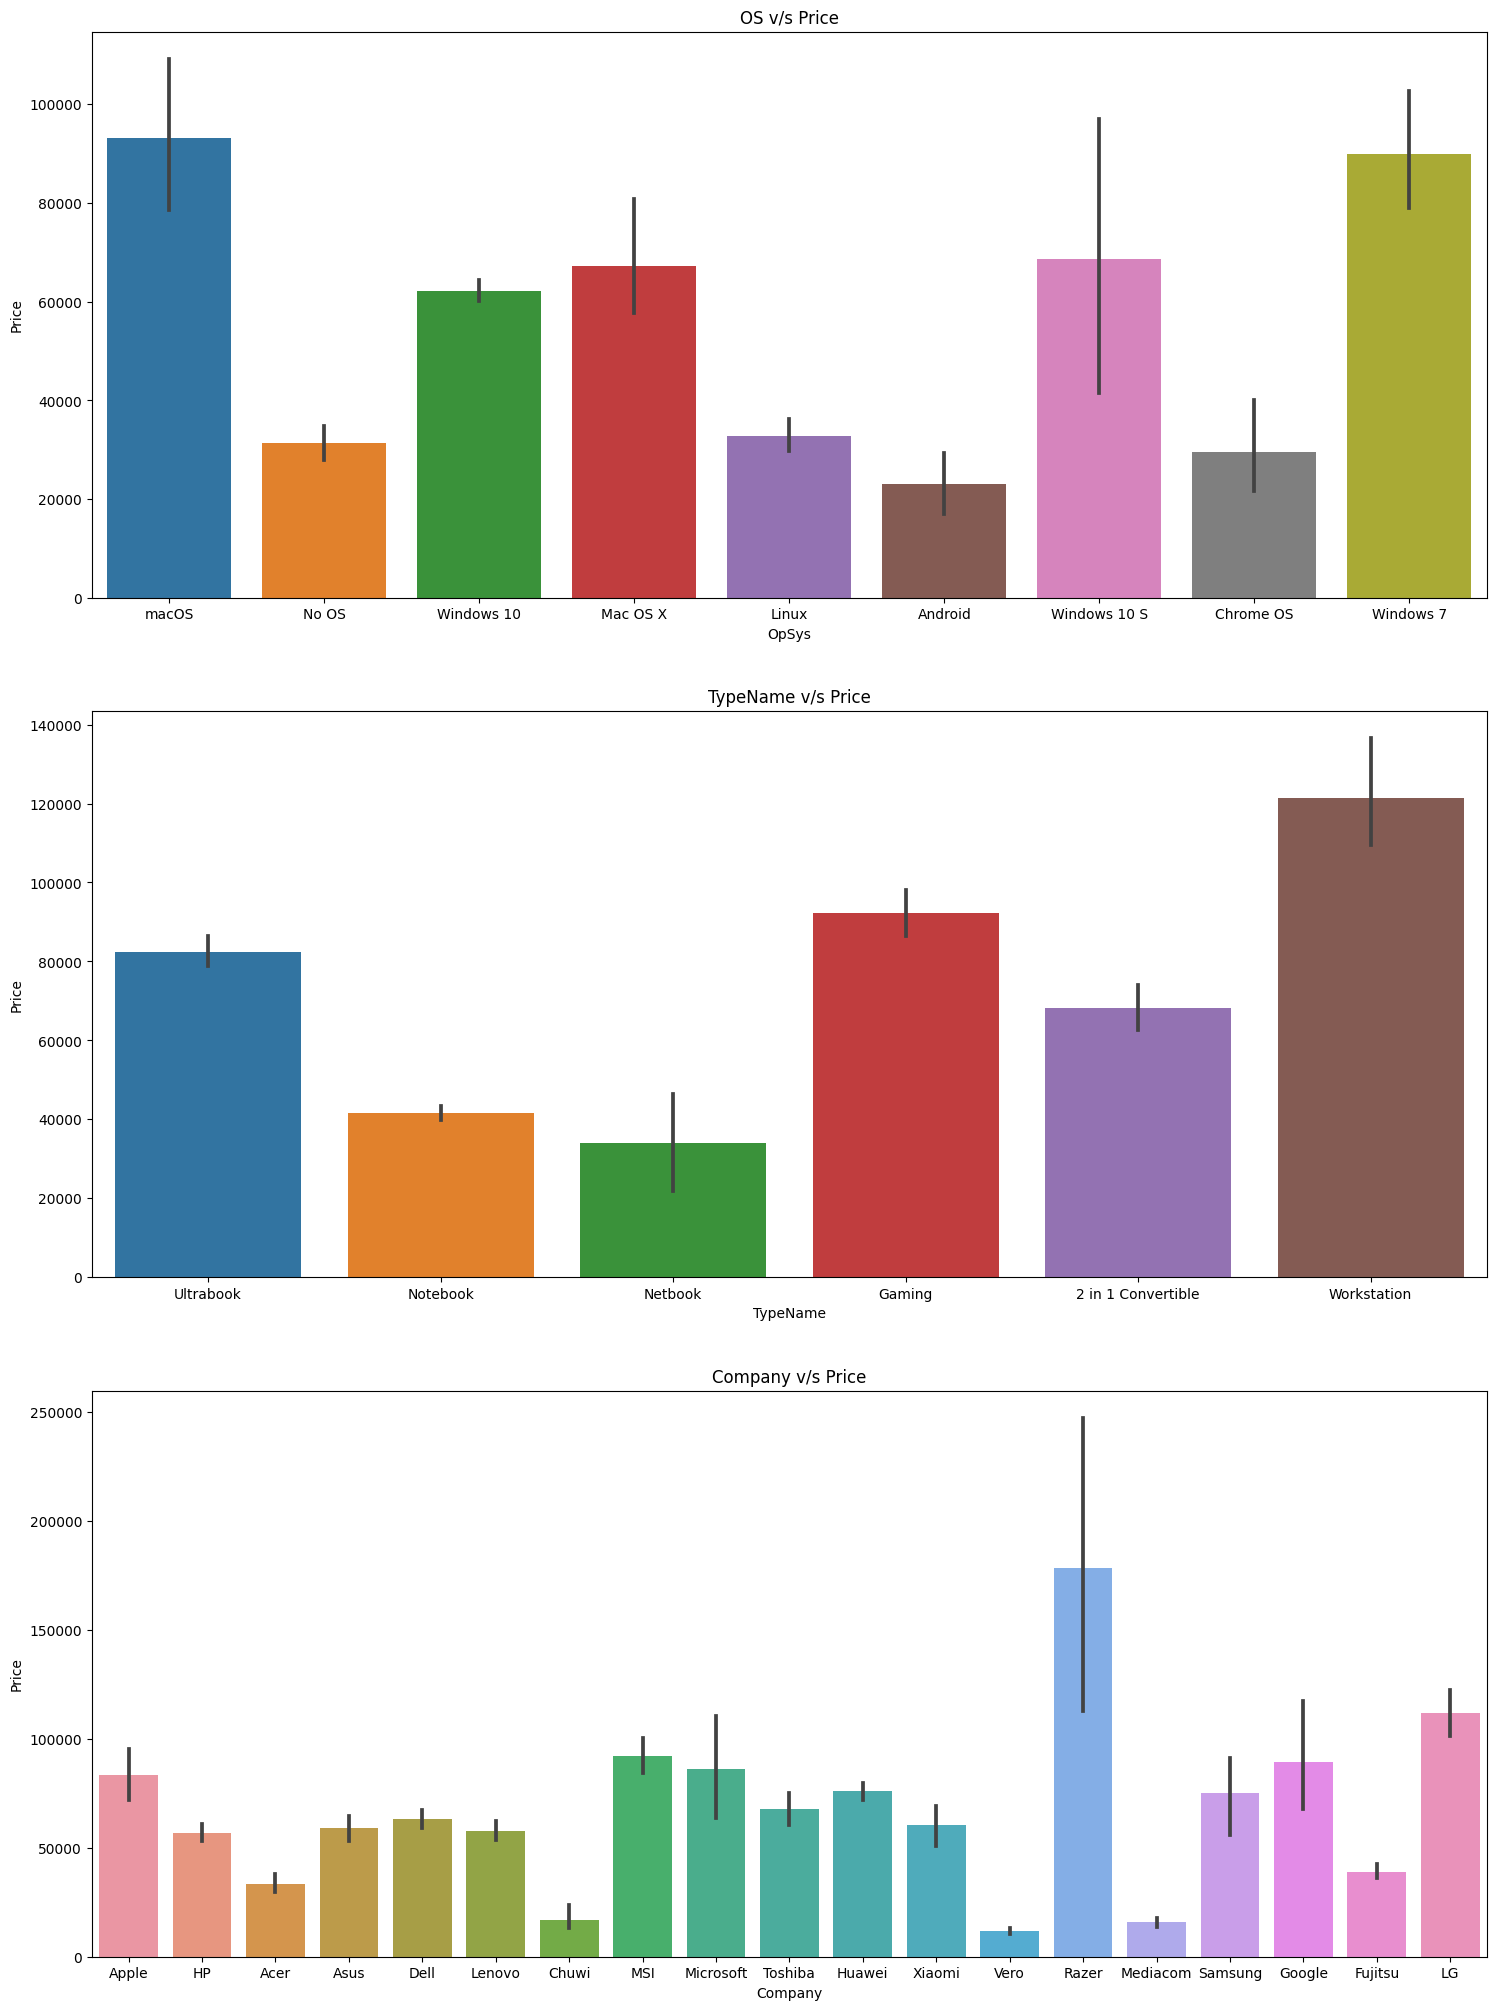

In [14]:
fig, ax= plt.subplots(3, 1, figsize= (18, 25))
sns.barplot(data= data, x= 'OpSys', y='Price', ax= ax[0])
ax[0].set_title('OS v/s Price')
sns.barplot(data= data, x= 'TypeName', y='Price', ax= ax[1])
ax[1].set_title('TypeName v/s Price')
sns.barplot(data= data, x= 'Company', y='Price', ax= ax[2])
ax[2].set_title('Company v/s Price')

<Axes: >

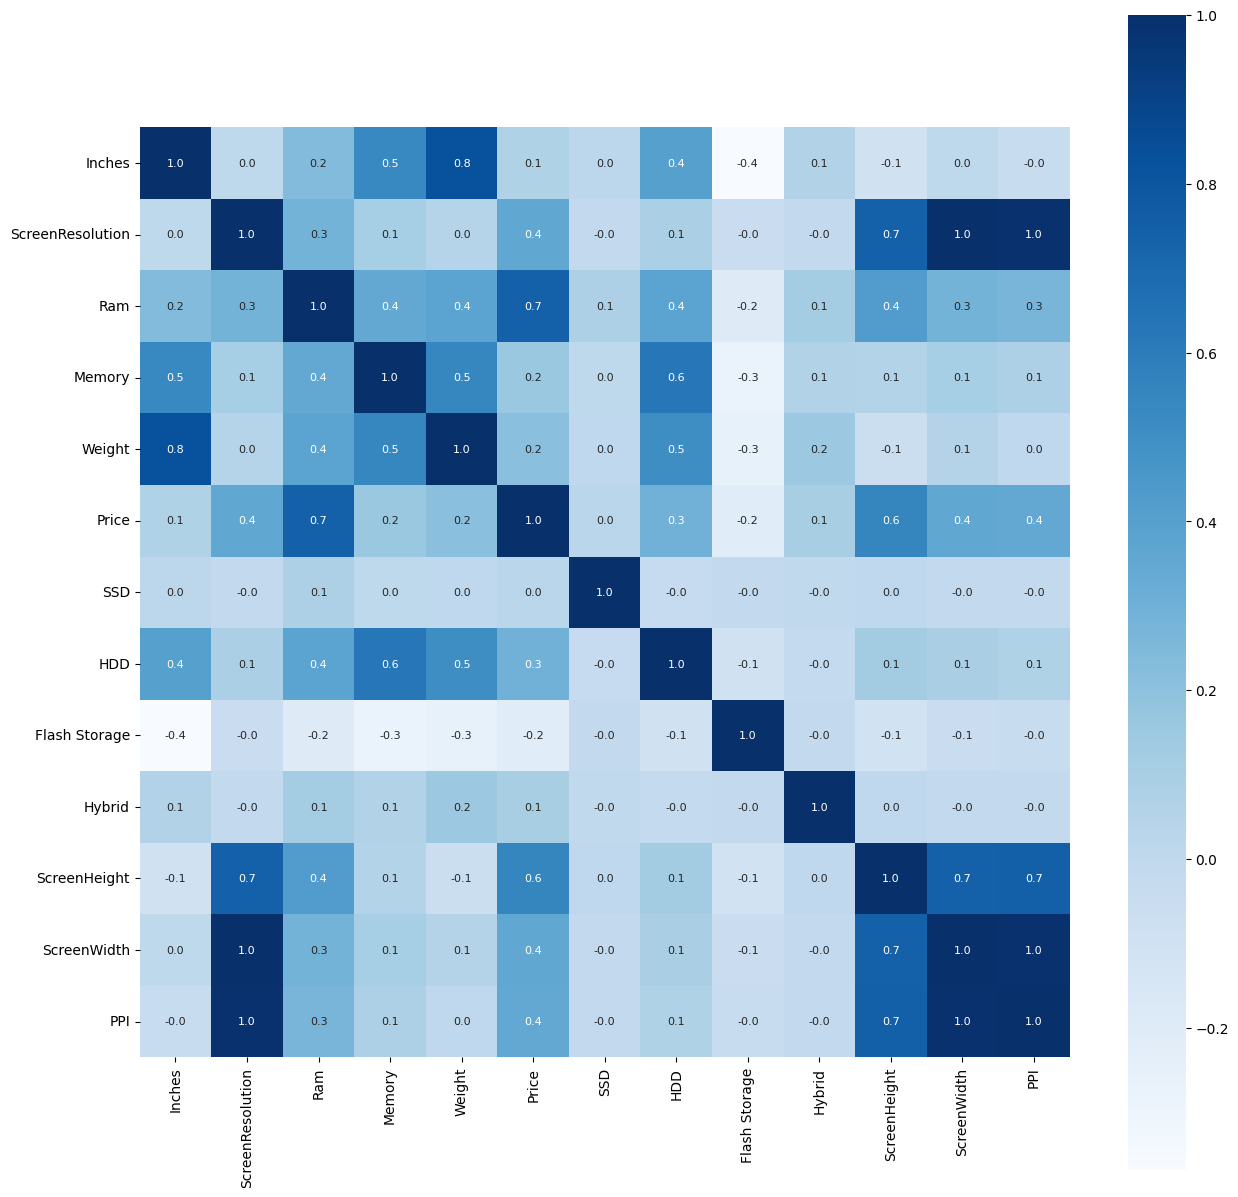

In [15]:
num_data= data.select_dtypes(include=['number'])
correlation= num_data.corr()

fig= plt.figure(figsize=(15, 15))
sns.heatmap(correlation, cbar= True, square= True, annot= True, fmt= '.1f',  annot_kws={'size':8}, cmap= 'Blues')

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x= num_data.drop(columns='Price')

vif= pd.DataFrame()
vif['Features']= x.columns
vif['VIF']= [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF
0,Inches,254.345237
1,ScreenResolution,8484.952228
2,Ram,6.383038
3,Memory,5.703461
4,Weight,37.968788
5,SSD,1.016713
6,HDD,2.332399
7,Flash Storage,1.164871
8,Hybrid,1.066707
9,ScreenHeight,38.069937


In [17]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD,HDD,Flash Storage,Hybrid,ScreenHeight,ScreenWidth,PPI
Index,,,,,,,,,,,,,,,,,,
0,Apple,Ultrabook,13.3,4096000,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,0,0,1600,2560,226.983005
1,Apple,Ultrabook,13.3,1296000,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1,0,900,1440,127.677940
2,HP,Notebook,15.6,2073600,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,0,0,1080,1920,141.211998
3,Apple,Ultrabook,15.4,5184000,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,0,0,1800,2880,220.534624
4,Apple,Ultrabook,13.3,4096000,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,0,0,1600,2560,226.983005


In [18]:
data= pd.get_dummies(data, columns= ['OpSys', 'TypeName'], drop_first= True, dtype= int)
data.head()

,Company,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,SSD,...,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
Index,,,,,,,,,,,,,,,,,,,,,
0,Apple,13.3,4096000,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,1.37,71378.6832,0,...,0,0,0,0,1,0,0,0,1,0
1,Apple,13.3,1296000,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,1.34,47895.5232,0,...,0,0,0,0,1,0,0,0,1,0
2,HP,15.6,2073600,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,1.86,30636.0000,0,...,1,0,0,0,0,0,0,1,0,0
3,Apple,15.4,5184000,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,1.83,135195.3360,0,...,0,0,0,0,1,0,0,0,1,0
4,Apple,13.3,4096000,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,1.37,96095.8080,0,...,0,0,0,0,1,0,0,0,1,0


In [19]:
X= data.drop(columns=['Price'], axis= 1)
X= X.select_dtypes(exclude= ['object'])
Y= data['Price']
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.2, random_state= 2)

In [20]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of X_train: (1042, 25)
Shape of X_test: (261, 25)
Shape of Y_train: (1042,)
Shape of Y_test: (261,)


In [21]:
std_scaler= StandardScaler()

std_scaler.fit(X_train)

X_train_scaled= std_scaler.transform(X_train)
X_test_scaled= std_scaler.transform(X_test)

In [22]:
model= LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [23]:
Y_pred= model.predict(X_test_scaled)

In [24]:
rmse= np.sqrt(mean_squared_error(Y_test, Y_pred))
mae= mean_absolute_error(Y_test, Y_pred)
r2= r2_score(Y_test, Y_pred)

print(f'RMSE: {rmse}')
print(f'r2 score: {r2}')
print(f'MAE: {mae}')

RMSE: 17738.71413199786
r2 score: 0.70285340727992
MAE: 13262.461912893732
